In [169]:
from sklearn.datasets import load_digits
digits = load_digits()


In [131]:
type(digits.data)

numpy.ndarray

In [132]:
type(digits.target)

numpy.ndarray

In [133]:
print('Image data shape',digits.data.shape)

Image data shape (1797, 64)


In [134]:
print('Label data shape',digits.target.shape)

Label data shape (1797,)


In [135]:
import matplotlib.pyplot as plt 
import numpy as np

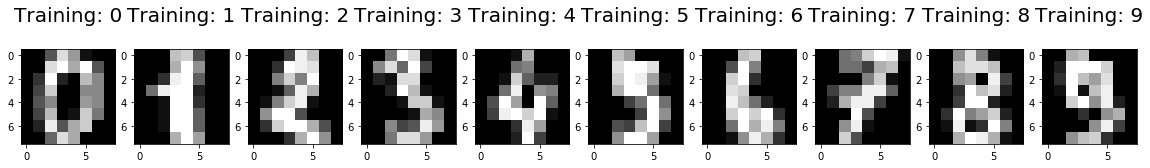

In [136]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [138]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [139]:
def costFunctionReg(theta, X, y,lmbda):
    m = len(y)
    e=10**(-6) 
    temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta)+e)))
    temp2 = np.multiply(1-y, np.log(1-sigmoid(np.dot(X, theta))+e))
    return np.sum(temp1 + temp2) / (-m) + np.sum(theta[1:]**2) * lmbda / (2*m)

In [140]:
def gradRegularization(theta, X, y,lmbda):
    m = len(y)
    temp = sigmoid(np.dot(X, theta)) - y
    temp = np.dot(temp.T, X).T / m + theta * lmbda / m
    temp[0] = temp[0] - theta[0] * lmbda / m
    return temp

In [141]:
X = x_train
Y = y_train


In [142]:
m = len(Y)
ones = np.ones((m,1))
X = np.hstack((ones, X))
X.shape

(1347, 65)

In [143]:
(m,n) = X.shape

In [144]:
m,n

(1347, 65)

In [145]:
type(digits.data)

numpy.ndarray

In [146]:
import scipy

In [168]:
lmbda = 0.1
k = 10
theta = np.zeros((k,n)) #inital parameters
for i in range(k):
    digit_class = i
    theta[i] = scipy.optimize.fmin_cg(f = costFunctionReg, x0 = theta[i],  fprime = gradRegularization, args = (X, (Y == digit_class).flatten(), lmbda), maxiter = 5)

         Current function value: 0.014070
         Iterations: 5
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 0.097157
         Iterations: 5
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 0.024841
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 0.065337
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 0.029023
         Iterations: 5
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 0.032628
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 0.028947
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 0.019391
         Iterations: 5
      

In [148]:
theta
    

array([[-6.93328040e-03,  0.00000000e+00, -8.43373866e-03,
        -3.87906712e-02,  2.52440484e-02, -5.59100519e-02,
        -1.13847535e-01, -4.00987350e-02, -3.50399323e-03,
        -9.02561979e-05, -3.28347647e-02,  2.03819006e-02,
         2.05217251e-02,  9.58640516e-02,  1.43144800e-01,
        -2.76475674e-02, -2.89307956e-03, -2.59948422e-05,
         1.86396250e-02,  5.44322635e-02, -2.68911881e-02,
        -1.11821658e-01,  2.08891888e-01,  1.54804559e-02,
        -2.50070017e-03, -1.23292288e-05,  3.54466852e-02,
         4.56788007e-03, -1.40748986e-01, -2.72953567e-01,
         5.86687754e-02,  3.76931954e-02, -6.55953672e-04,
         0.00000000e+00,  1.36523484e-02,  5.30819175e-02,
        -1.52612882e-01, -2.96308913e-01, -6.79734993e-02,
         3.51337499e-02,  0.00000000e+00, -1.69651540e-03,
        -6.09804027e-02,  9.61551567e-02, -1.42459994e-01,
        -1.84639061e-01, -8.52143863e-03, -1.05143184e-02,
        -5.88896308e-04, -5.23196301e-03, -4.70256940e-0

In [164]:
def prediction(X,theta,y):
    pred = np.argmax(X @ theta.T, axis = 1)
    return np.mean(pred == Y.flatten()) * 100
    


In [162]:
print(prediction(X,theta,Y))

94.87750556792874


In [151]:
m = len(y_test)
ones = np.ones((m,1))
x_test = np.hstack((ones, x_test))



In [165]:
print(x_test.shape)
print(y_test.shape)
print(prediction(x_test,theta,y_test))
pred = np.argmax(x_test @ theta.T, axis = 1)

np.mean(pred == y_test.flatten()) * 100

(450, 65)
(450,)
0.0


<ipython-input-164-f25ff600b515>:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return np.mean(pred == Y.flatten()) * 100


93.77777777777779

In [166]:
pred = np.argmax(x_test @ theta.T, axis = 1)
np.mean(pred == y_test.flatten()) * 100

93.77777777777779